### Storytelling Data Visualization on Exchange Rates

There are two types of data visualization:

 * Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
 * Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.

Throughout the Project, we focused on explanatory data visualization and learned the following:

* How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
* About the elements of a story and how to create storytelling data visualizations using Matplotlib.
* How to guide the audience's attention with pre-attentive attributes.
* How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
exchange_rates = pd.read_csv("euro-daily-hist_1999_2022.csv")
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

In [4]:
exchange_rates.rename(columns={'[US dollar ]' : 'US_dollar' , 'Period\\Unit:': 'Time'} , inplace=True)

In [5]:
exchange_rates["Time"] = pd.to_datetime(exchange_rates["Time"])

In [6]:
exchange_rates.sort_values("Time", inplace = True)

In [7]:
exchange_rates

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
6455,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693


In [8]:
eur_to_usd = exchange_rates[["Time","US_dollar"]].copy()

In [9]:
eur_to_usd["US_dollar"].value_counts()

US_dollar
-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: count, Length: 3769, dtype: int64

In [10]:
eur_to_usd = eur_to_usd[eur_to_usd["US_dollar"] != "-"]

In [11]:
eur_to_usd["US_dollar"] = eur_to_usd["US_dollar"].astype(float)

In [12]:
eur_to_usd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6394 non-null   datetime64[ns]
 1   US_dollar  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


## Rolling Mean

In [13]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

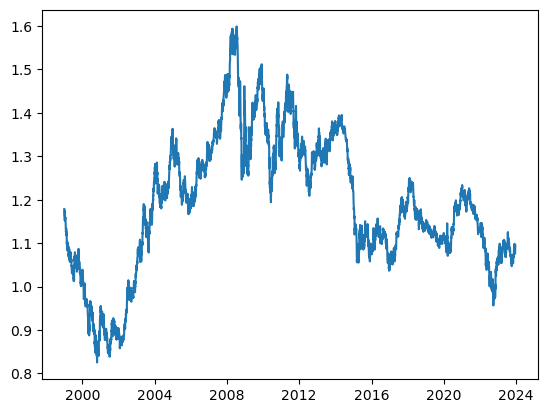

In [14]:
plt.plot(eur_to_usd["Time"], eur_to_usd["US_dollar"])
plt.show

Examining the line's form, we notice numerous minor fluctuations rather than a consistent, smooth line. Yet, these fluctuations hold significance: they depict the daily fluctuations in the exchange rate. Daily, the rate experiences fluctuations, ascending and descending repeatedly. However, clear upward or downward trends in the rate emerge over more extended periods, such as months or years.

Depending on our objectives, we might prefer not to display this daily variation on our graph. Should we aim to conceal it and exhibit solely the long-term trends, employing the rolling mean (also recognized as the moving average) can be beneficial.

In [15]:
values = pd.DataFrame()
values["daily_values"] = pd.Series(range(1,20,2))
values

,daily_values
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [16]:
values["rolling_mean_2"] = values["daily_values"].rolling(2).mean()
values["rolling_mean_3"] = values["daily_values"].rolling(3).mean()
values["rolling_mean_5"] = values["daily_values"].rolling(5).mean()
values

,daily_values,rolling_mean_2,rolling_mean_3,rolling_mean_5
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,NaN
4,9,8.0,7.0,5.0
5,11,10.0,9.0,7.0
6,13,12.0,11.0,9.0
7,15,14.0,13.0,11.0
8,17,16.0,15.0,13.0
9,19,18.0,17.0,15.0


<function matplotlib.pyplot.show(close=None, block=None)>

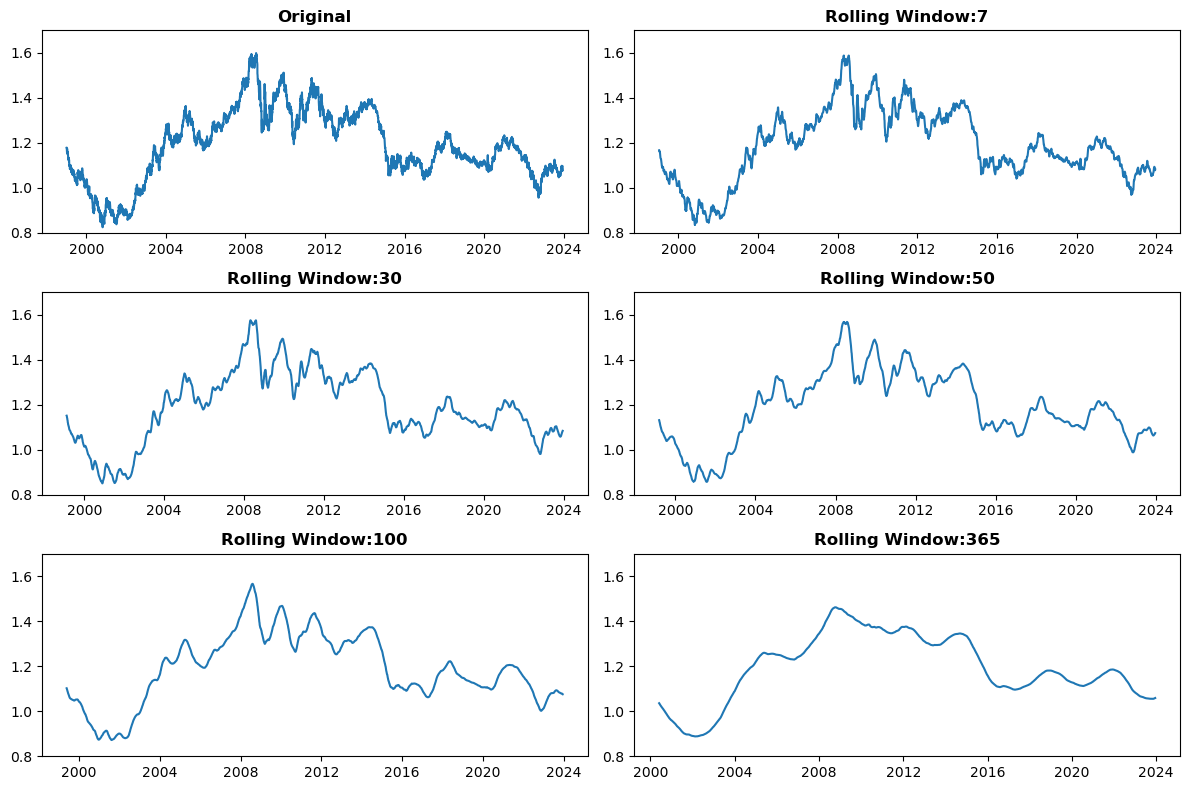

In [17]:
plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
plt.plot(eur_to_usd["Time"],eur_to_usd["US_dollar"])
plt.title("Original", weight = "bold")
plt.ylim(0.8,1.7,0.2)

for i, rolling_mean in zip([2,3,4,5,6],[7,30,50,100,365]):
    plt.subplot(3,2,i)
    plt.plot(eur_to_usd["Time"],eur_to_usd["US_dollar"].rolling(rolling_mean).mean())
    plt.title("Rolling Window:" + str(rolling_mean), weight = "bold")
    plt.ylim(0.8,1.7,0.2)

plt.tight_layout()
plt.show

In [18]:
eur_to_usd["rolling_mean"] = eur_to_usd["US_dollar"].rolling(30).mean()
eur_to_usd

,Time,US_dollar,rolling_mean
6455,1999-01-04,1.1789,NaN
6454,1999-01-05,1.1790,NaN
6453,1999-01-06,1.1743,NaN
6452,1999-01-07,1.1632,NaN
6451,1999-01-08,1.1659,NaN
...,...,...,...
4,2023-12-11,1.0757,1.080143
3,2023-12-12,1.0804,1.080760
2,2023-12-13,1.0787,1.081593
1,2023-12-14,1.0919,1.082453


### Coming up with an Idea
Here are a few story ideas centered around data:
#### 1) Financial Crises (2007-2008)
Examining the variations in the euro-dollar rate during the 2007-2008 Financial Crisis, with additional data from 2006 and 2009 for contextual comparison. This narrative could be presented using a line plot to highlight the fluctuations across the specified time frame.

##### 2) Covid-19 pandemic (2020-2023)
Illustrating the fluctuation of the euro-dollar rate throughout the course of the coronavirus pandemic. This could involve comparing the data from 2020-2023 to the baseline of 2016-2020, utilizing a line plot to visualize the changes over time.

##### 3) Tenures of US Presidents
Analyzing the comparative shifts in the euro-dollar rate over the tenures of the last three US Presidents: George W. Bush (2001-2009), Barack Obama (2009-2017), Donald Trump (2017-2021), and Joe Biden (2021-2023). Utilizing a line plot, this story would illustrate how the exchange rate evolved throughout each presidency, offering insights into potential economic policies and their impacts.

# Storytelling Data Visualization

## 1) Financial Crises 2007-2008

In [19]:
financial_crisis = eur_to_usd[(eur_to_usd["Time"].dt.year >= 2006) & (eur_to_usd["Time"].dt.year <= 2009)]
financial_crisis_7_8 = eur_to_usd[(eur_to_usd["Time"].dt.year >= 2007) & (eur_to_usd["Time"].dt.year <= 2008)]

### (a) Without Using any Style

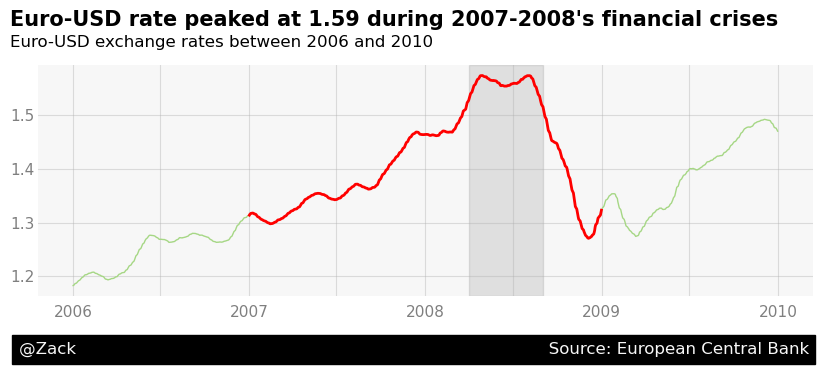

In [20]:
fig,ax = plt.subplots(figsize=(10,3))
ax.plot(financial_crisis['Time'], financial_crisis['rolling_mean'], linewidth=1 , color="#A6D785")

# formatting x-ticks labels
ax.set_xticklabels([])
years = list(financial_crisis["Time"].dt.year.unique())
years.append("2010")
x=0.02
for i in years:
    ax.text(x, -0.09, i, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
    x += 0.2275

# formatting y-ticks labels
ax.set_yticklabels([])
y=0.06
for i in [1.2, 1.3, 1.4, 1.5]:
    plt.text(-0.036, y, i, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
    y += 0.233

# adding title and sub-title
title = "Euro-USD rate peaked at 1.59 during 2007-2008's financial crises"
sub_title = "Euro-USD exchange rates between 2006 and 2010"   
plt.text(-0.036, 1.17, title, fontsize=15, weight="bold", transform = plt.gca().transAxes)
plt.text(-0.036, 1.08, sub_title, fontsize=12, transform = plt.gca().transAxes)
    
# highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'], financial_crisis_7_8['rolling_mean'], linewidth=2 , color="red")

# Adding a signature
plt.text(-0.025, -0.25, "@Zack" + " "*90 + "Source: European Central Bank", 
         color = "#f7f7f7", backgroundcolor = "black", fontsize = 12, transform = plt.gca().transAxes)

# shading a region
#plt.axvspan(xmin = pd.to_datetime("2008-04-01") , xmax = pd.to_datetime("2008-09-01"), color = "grey", alpha=0.3)
plt.axvspan(xmin = "2008-04-01" , xmax = "2008-09-01", color = "grey", alpha=0.2)

# removing spines
for i in ["top", "bottom", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

ax.grid(alpha=0.4)
ax.set_facecolor("#f7f7f7")
ax.tick_params(left = 0, bottom = 0)

### (b) (i) Using any Style for the Graph
List of some styles:
* 'bmh' : A style based on the Bayesian Methods for Hackers design.
* 'classic' :    A classic matplotlib style.
* 'dark_background' :    A style with dark background colors.
* 'fast' :    A minimalistic, fast rendering style.
* 'fivethirtyeight' :    Mimics the style of plots found on the FiveThirtyEight website.
* 'ggplot' :    Mimics the style of the popular ggplot library in R.
* 'grayscale' :    A style with grayscale colors.
* 'seaborn-bright' :    A style with bright colors, similar to Seaborn.
* 'seaborn-colorblind' :    A style optimized for colorblind users, similar to Seaborn.
* 'seaborn-dark' :    A dark style similar to Seaborn.
* 'seaborn-dark-palette' :    A dark style with a palette similar to Seaborn.
* 'seaborn-darkgrid' :    A dark style with grid lines, similar to Seaborn.
* 'seaborn-deep' :    A deep, saturated style similar to Seaborn.
* 'seaborn-muted' :    A muted style similar to Seaborn.
* 'seaborn-notebook' :    A style optimized for Jupyter Notebook, similar to Seaborn.
* 'seaborn-paper' :    A style optimized for printing, similar to Seaborn.
* 'seaborn-pastel' :    A pastel style similar to Seaborn.
* 'seaborn-poster' :    A style optimized for posters, similar to Seaborn.
* 'seaborn-talk' :    A style optimized for presentations, similar to Seaborn.
* 'seaborn-ticks' :    A style with ticks, similar to Seaborn.
* 'seaborn-white' :    A white style similar to Seaborn.
* 'seaborn-whitegrid' :    A white style with grid lines, similar to Seaborn.

### For Example
#### Using classic style

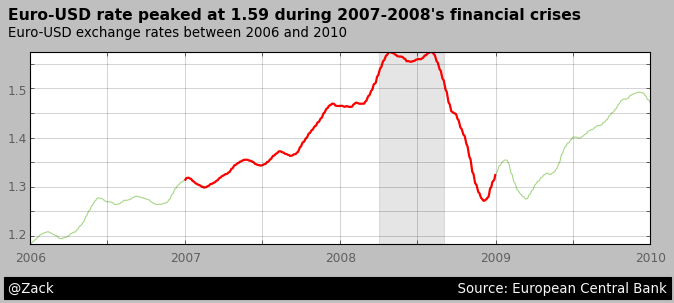

In [21]:
# with plt.style.context("style_name")
with plt.style.context("classic"):
    
    fig,ax = plt.subplots(figsize=(10,3))
    ax.plot(financial_crisis['Time'], financial_crisis['rolling_mean'], linewidth=1 , color="#A6D785")

# formatting x-ticks labels
    ax.set_xticklabels([])
    years = list(financial_crisis["Time"].dt.year.unique())
    years.append("2010")
    x=-0.025
    for i in years:
        ax.text(x, -0.09, i, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
        x += 0.25

# formatting y-ticks labels
    ax.set_yticklabels([])
    y=0.03
    for i in [1.2, 1.3, 1.4, 1.5]:
        plt.text(-0.036, y, i, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
        y += 0.25

# adding title and sub-title
    title = "Euro-USD rate peaked at 1.59 during 2007-2008's financial crises"
    sub_title = "Euro-USD exchange rates between 2006 and 2010"   
    plt.text(-0.036, 1.17, title, fontsize=14, weight="bold", transform = plt.gca().transAxes)
    plt.text(-0.036, 1.08, sub_title, fontsize=12, transform = plt.gca().transAxes)

# highlighting the 2007-2008 period
    ax.plot(financial_crisis_7_8['Time'], financial_crisis_7_8['rolling_mean'], linewidth=2 , color="red")

# Adding a signature
    plt.text(-0.036, -0.25, "@Zack" + " "*95 + "Source: European Central Bank", 
             color = "#f7f7f7", backgroundcolor = "black", fontsize = 12, transform = plt.gca().transAxes)

# shading a region
    #plt.axvspan(xmin = pd.to_datetime("2008-04-01") , xmax = pd.to_datetime("2008-09-01"), color = "grey", alpha=0.3)
    plt.axvspan(xmin = "2008-04-01" , xmax = "2008-09-01", color = "grey", alpha=0.2)
    
    plt.grid(linestyle = "-", alpha = 0.3)

### (ii) With Using Style "fivethirtyeight"

In [22]:
import matplotlib.style as style
style.use('fivethirtyeight')

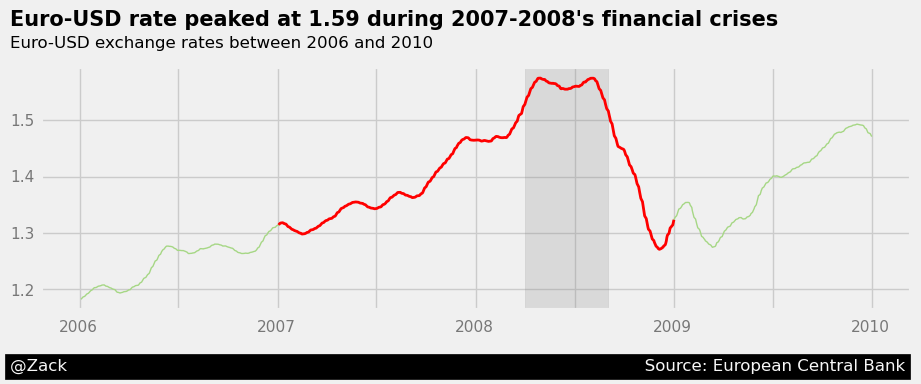

In [23]:
fig,ax = plt.subplots(figsize=(10,3))
ax.plot(financial_crisis['Time'], financial_crisis['rolling_mean'], linewidth=1 , color="#A6D785")

# formatting x-ticks labels
ax.set_xticklabels([])
years = list(financial_crisis["Time"].dt.year.unique())
years.append("2010")
x=0.02
for i in years:
    ax.text(x, -0.09, i, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
    x += 0.2275

# formatting y-ticks labels
ax.set_yticklabels([])
y=0.06
for i in [1.2, 1.3, 1.4, 1.5]:
    plt.text(-0.036, y, i, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
    y += 0.233

# adding title and sub-title
title = "Euro-USD rate peaked at 1.59 during 2007-2008's financial crises"
sub_title = "Euro-USD exchange rates between 2006 and 2010"   
plt.text(-0.036, 1.17, title, fontsize=15, weight="bold", transform = plt.gca().transAxes)
plt.text(-0.036, 1.08, sub_title, fontsize=12, transform = plt.gca().transAxes)
    
# highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'], financial_crisis_7_8['rolling_mean'], linewidth=2 , color="red")

# Adding a signature
plt.text(-0.036, -0.25, "@Zack" + " "*110 + "Source: European Central Bank", 
         color = "#f7f7f7", backgroundcolor = "black", fontsize = 12, transform = plt.gca().transAxes)

# shading a region
#plt.axvspan(xmin = pd.to_datetime("2008-04-01") , xmax = pd.to_datetime("2008-09-01"), color = "grey", alpha=0.3)
plt.axvspan(xmin = "2008-04-01" , xmax = "2008-09-01", color = "grey", alpha=0.2)

## 2) Covid-19 pandemic 2020-2023

In [24]:
covid_pandemic = eur_to_usd[(eur_to_usd["Time"].dt.year >= 2016) & (eur_to_usd["Time"].dt.year <= 2023)]
covid_pandemic_20_23 = eur_to_usd[(eur_to_usd["Time"].dt.year >= 2020) & (eur_to_usd["Time"].dt.year <= 2023)]

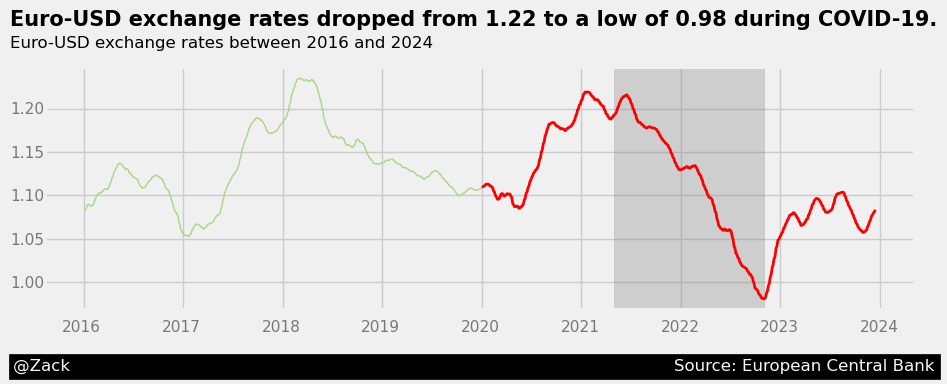

In [25]:
fig,ax = plt.subplots(figsize=(10,3))
ax.plot(covid_pandemic['Time'], covid_pandemic['rolling_mean'], linewidth=1 , color="#A6D785")

# formatting x-ticks labels
ax.set_xticklabels([])
years = list(covid_pandemic["Time"].dt.year.unique())
years.append("2024")
x=0.02
for i in years:
    ax.text(x, -0.09, i, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
    x += 0.1146

# formatting y-ticks labels
ax.set_yticklabels([])
y=0.09
for i in ["1.00", "1.05", "1.10", "1.15", "1.20"]:
    plt.text(-0.04, y, i, alpha=0.5, fontsize=11, transform = plt.gca().transAxes)
    y += 0.179

# adding title and sub-title
title = "Euro-USD exchange rates dropped from 1.22 to a low of 0.98 during COVID-19."
sub_title = "Euro-USD exchange rates between 2016 and 2024"   
plt.text(-0.04, 1.17, title, fontsize=15, weight="bold", transform = plt.gca().transAxes)
plt.text(-0.04, 1.08, sub_title, fontsize=12, transform = plt.gca().transAxes)
    
# highlighting the 2007-2008 period
ax.plot(covid_pandemic_20_23['Time'], covid_pandemic_20_23['rolling_mean'], linewidth=2 , color="red")

# Adding a signature
plt.text(-0.036, -0.25, "@Zack" + " "*115 + "Source: European Central Bank", 
         color = "#f7f7f7", backgroundcolor = "black", fontsize = 12, transform = plt.gca().transAxes)

# shading a region
#plt.axvspan(xmin = pd.to_datetime("2008-04-01") , xmax = pd.to_datetime("2008-09-01"), color = "grey", alpha=0.3)
plt.axvspan(xmin = "2021-05-01" , xmax = "2022-11-01", color = "grey", alpha=0.3)

## 3) Tenures of US Presidents

In [26]:
all_tenure = eur_to_usd[(eur_to_usd["Time"].dt.year >= 2001) & (eur_to_usd["Time"].dt.year <= 2023)]
bush = eur_to_usd[(eur_to_usd["Time"].dt.year >= 2001) & (eur_to_usd["Time"].dt.year < 2009)]
obama = eur_to_usd[(eur_to_usd["Time"].dt.year >= 2009) & (eur_to_usd["Time"].dt.year < 2017)]
trump = eur_to_usd[(eur_to_usd["Time"].dt.year >= 2017) & (eur_to_usd["Time"].dt.year < 2021)]
biden = eur_to_usd[(eur_to_usd["Time"].dt.year >= 2021) & (eur_to_usd["Time"].dt.year <= 2023)]

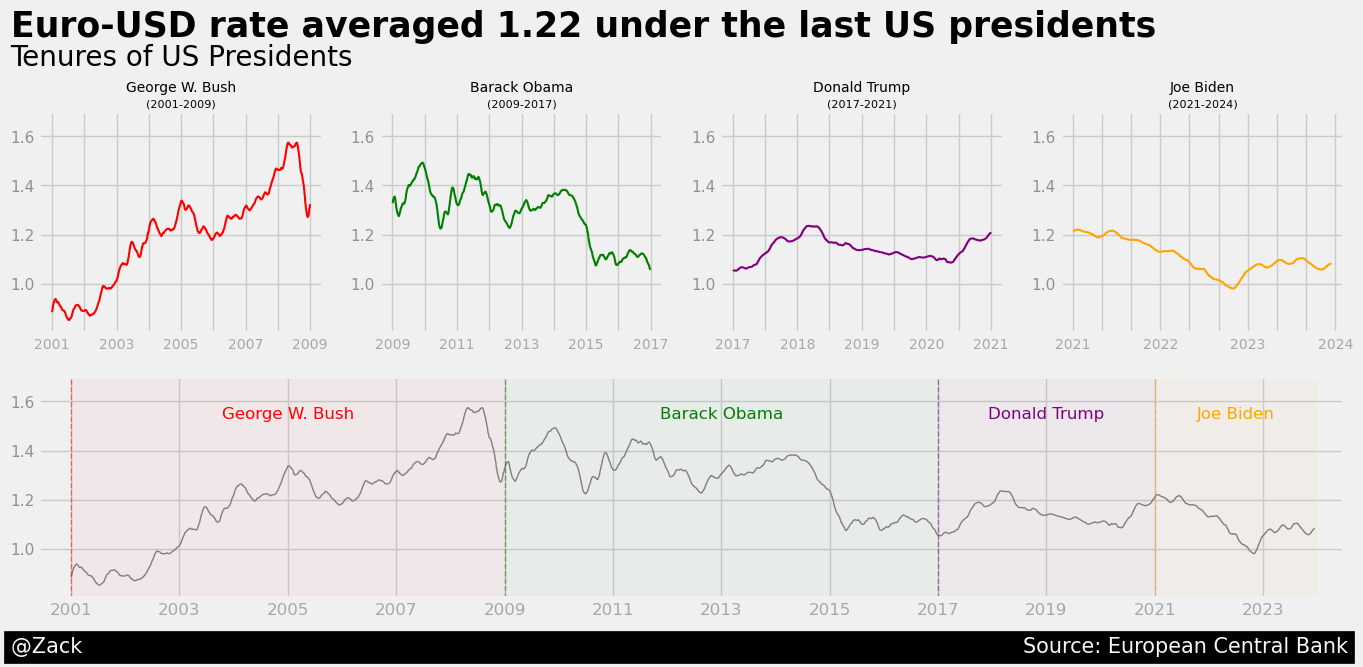

In [27]:
## Adding the subplots 
plt.figure(figsize=(15, 6))
# pattern
ax1 = plt.subplot(2,4,1) # row , col , index
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)
# pattern
ax = plt.subplot(2,1,2) # row , col , index

# plotting main chart
ax.plot(all_tenure["Time"], all_tenure["rolling_mean"], linewidth=1 , color="grey")
# y_ticks
ax.set_ylim(0.8, 1.7)
ax.set_yticks([1.0, 1.2, 1.4, 1.6])
ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha=0.4, size=11)
# x_ticks
ax.set_xlim(pd.to_datetime("2000-06-01"), pd.to_datetime("2024-07-01"))
ax.set_xticks(pd.date_range("2001-01-01", "2024-01-01", freq="2AS"))
ax.set_xticklabels(list(range(2001,2024,2)), alpha=0.3, size=12)

# for small charts
axis = [ax1, ax2, ax3, ax4]
pms = [bush, obama, trump, biden]
header = ["George W. Bush", "Barack Obama", "Donald Trump", "Joe Biden"]
tenures = ["(2001-2009)", "(2009-2017)", "(2017-2021)", "(2021-2024)"]
colr = ["red","green","purple","orange"]

for i,j,k,l,m in zip(axis, pms, header, tenures,colr):
    i.plot(j["Time"], j["rolling_mean"], color = m, linewidth = 1.5)
    i.set_ylim(0.8, 1.7)
    i.set_yticks([1.0, 1.2, 1.4, 1.6])
    i.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha=0.4, size=11)
    i.text(0.5, 1.09, k, horizontalalignment = "center", size = 10, transform = i.transAxes)
    i.text(0.5, 1.02, l, horizontalalignment = "center", size = 8, transform = i.transAxes)
        
ax1.set_xticklabels(["", "2001", "", "2003", "", "2005", "", "2007", "", "2009"], alpha=0.3, size=10)
ax2.set_xticklabels(["", "2009", "", "2011", "", "2013", "", "2015", "", "2017"], alpha=0.3, size=10)
ax3.set_xticklabels(["2017", "", "2018", "", "2019", "", "2020", "", "2021"], alpha=0.3, size=10)
ax4.set_xticklabels(["2021", "", "", "2022", "", "", "2023", "", "", "2024"], alpha=0.3, size=10)

# for main chart
dates_s = ["2001-01-01", "2009-01-01", "2017-01-01", "2021-01-01"]
dates_e = ["2009-01-01", "2017-01-01", "2021-01-01", "2024-01-01"]

for i,j,k,l in zip(dates_s, dates_e, colr, header):
    ax.axvspan(xmin = i, xmax = j, color = k, alpha=0.03)
    ax.axvline(x= pd.to_datetime(i), color= k, linestyle='--', linewidth= 1, alpha = 0.5)
    s_date = pd.to_datetime(i)
    e_date = pd.to_datetime(j)
    avg_date = s_date + (e_date - s_date) / 2
    f_date = s_date + (avg_date - s_date)
    ax.text(f_date, 1.53, l, horizontalalignment = "center", size = 12, color = k)

# adding title and sub-title
title = "Euro-USD rate averaged 1.22 under the last US presidents"
sub_title = "Tenures of US Presidents"
plt.text(-0.022, 2.54, title, fontsize=25, weight="bold",  transform= plt.gca().transAxes)
plt.text(-0.022, 2.41, sub_title, fontsize=20 ,transform= plt.gca().transAxes)

# Adding a signature
plt.text(-0.022, -0.25, "@Zack" + " "*142 + "Source: European Central Bank", 
         color = "#f7f7f7", backgroundcolor = "black", fontsize = 15, transform = plt.gca().transAxes)

plt.show()